In [1]:
''' Sprint 3 - Data Science & Statistical Compuitng

Gabriel Aparecido Cassalho Xavier - RM99794
Gustavo Vegi - RM550188
Lucas Rodrigues Delfino - RM550196
Luísa Cristina dos Santos Neves - RM551889
Pedro Henrique Silva de Morais - RM98804
'''

' Sprint 3 - Data Science & Statistical Compuitng\n\nGabriel Aparecido Cassalho Xavier - RM99794\nGustavo Vegi - RM550188\nLucas Rodrigues Delfino - RM550196\nLuísa Cristina dos Santos Neves - RM551889\nPedro Henrique Silva de Morais - RM98804\n'

In [2]:
import pandas as pd
df = pd.read_csv('Sprint3 Diabetes.csv')

In [13]:
# Ver duplicatas
duplicated_rows = df.duplicated().sum()
print(f'quantidade de duplicatas: {duplicated_rows}')

#Duplicatas
df_sem_duplicatas = df.drop_duplicates()
print(f"Linhas antes da remoção: {df.shape[0]}, Linhas após a remoção: {df_sem_duplicatas.shape[0]}")


quantidade de duplicatas: 23899
Linhas antes da remoção: 253680, Linhas após a remoção: 229781


In [4]:
#Valores Nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [14]:
#Outliers

# Remover duplicatas
df_clean = df.drop_duplicates()

# Verificar o novo tamanho do dataframe após a remoção
df_clean.shape


# Função para tratamento de outliers usando o método do IQR
def tratar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_sem_outliers


df_sem_outliers = tratar_outliers(df, 'BMI')

print(f"Linhas antes da remoção de outliers: {df.shape[0]}, Linhas após: {df_sem_outliers.shape[0]}")


Linhas antes da remoção de outliers: 253680, Linhas após: 243833


In [6]:
#Estatisticas descritivas

estatisticas_descritivas = df.describe()
print(estatisticas_descritivas)

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

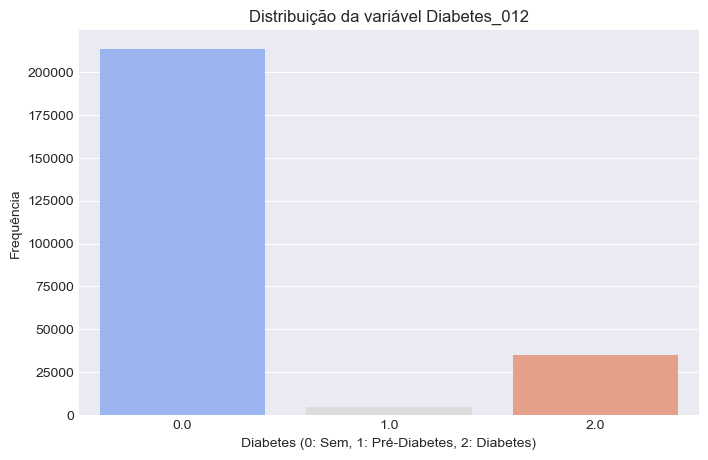

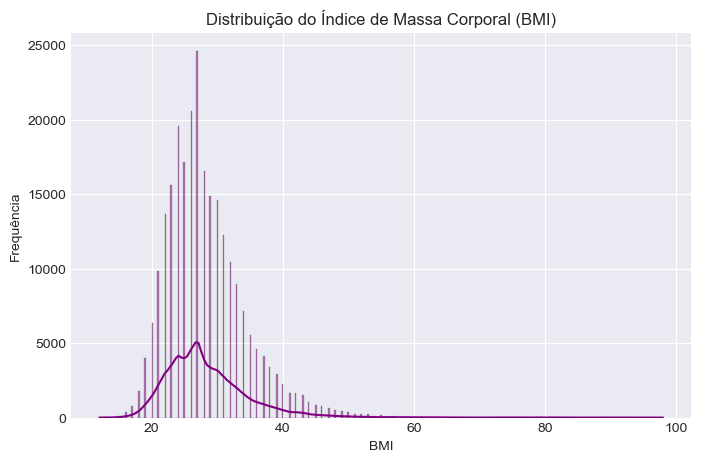

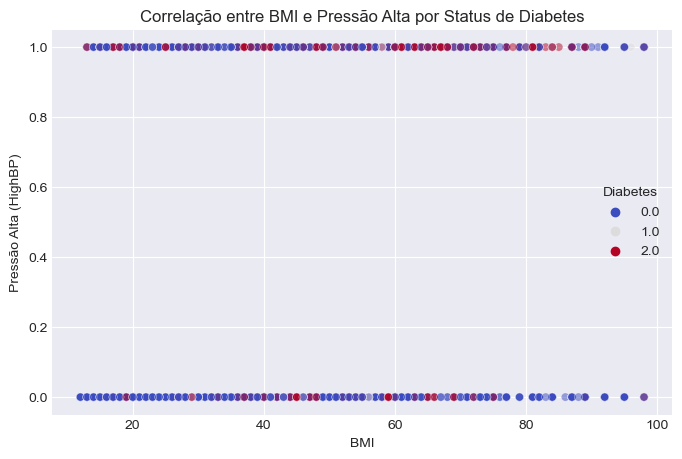

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

# Gráfico 1: Distribuição da variável 'Diabetes_012'
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_012', data=df, palette='coolwarm')
plt.title('Distribuição da variável Diabetes_012')
plt.xlabel('Diabetes (0: Sem, 1: Pré-Diabetes, 2: Diabetes)')
plt.ylabel('Frequência')
plt.show()

# Gráfico 2: Distribuição de IMC (BMI)
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], kde=True, color='purple')
plt.title('Distribuição do Índice de Massa Corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequência')
plt.show()

# Gráfico 3: Correlação entre IMC (BMI) e Pressão Alta (HighBP)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='HighBP', data=df, hue='Diabetes_012', palette='coolwarm', alpha=0.5)
plt.title('Correlação entre BMI e Pressão Alta por Status de Diabetes')
plt.xlabel('BMI')
plt.ylabel('Pressão Alta (HighBP)')
plt.legend(title='Diabetes')
plt.show()


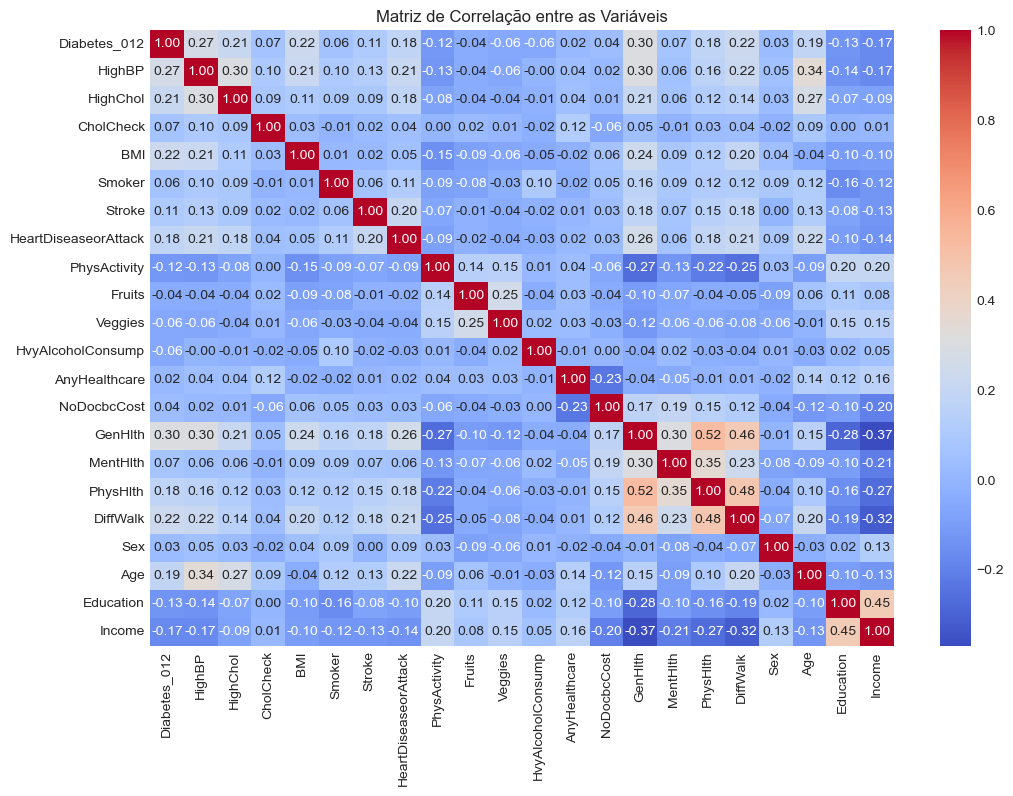

(113.81382298039709, 0.0)

In [9]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

# Teste de hipótese 1: Teste t de Student para comparar IMC entre diabéticos e não-diabéticos
from scipy.stats import ttest_ind

# Dividindo os dados entre diabéticos e não-diabéticos
diabetes_group = df[df['Diabetes_012'] == 2]['BMI']
no_diabetes_group = df[df['Diabetes_012'] == 0]['BMI']

# Teste t
t_stat, p_value = ttest_ind(diabetes_group, no_diabetes_group)

t_stat, p_value


In [10]:
# Teste de hipótese 2: Comparar a pressão arterial entre pessoas que praticam atividade física e que não praticam
active_group = df[df['PhysActivity'] == 1]['HighBP']
inactive_group = df[df['PhysActivity'] == 0]['HighBP']

# Teste t
t_stat_phys, p_value_phys = ttest_ind(active_group, inactive_group)

t_stat_phys, p_value_phys


(-63.59340237708988, 0.0)